# Sheet 2 - Bhavesh Rajpoot(wk282), Simran Joharle(vz282), Sachin Gupta(vl282)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='monospace', size=12)
plt.rc('mathtext', fontset='stix')


from scipy.stats import gaussian_kde

## 1 Kernel Density Estimation
### (a) Implement a Quartic (biweight) function:

$$ 
k(x-\mu;w) = \frac{15}{16w} \left( 1 - \left(\frac{x - \mu}{w}\right)^2 \right)^2 \qquad \textrm{with support in}\ [-w,w]
$$

substituting $u = \frac{x - \mu}{w}$ for generalising the equation:,
$$
k(u) = \frac{15}{16w} \left( 1 - \left( u \right)^2 \right)^2, \qquad  for\ |u|\le w
$$

In [80]:
 # defining kernel class
class kernels:
    '''
    A class to represent a set of kernels for KDE
    ...
    Attributes
    ----------
    x : float or nd.array
    mean : float or nd.array
    bandwidth : float

    Methods
    -------
    biweight(self):
        returns biweight kernel

    gaussain(self):
        returns gaussian kernel

    epa(self):
        returns epanechnikov kernel
    '''
    def __init__(self,x,mean,bandwidth): #initialising setp
        self.x = x
        self.mu = mean
        self.w = bandwidth
        self.u = (x-mean)/bandwidth

    # defining biweight kernel
    def biweight(self):
        """biweight kernel at mean mu, with bandwidth w evaluated at x"""
        #TODO: implement the quartic (biweight) kernel
        k=[]
        for i in range(0,len(self.x)): #if else condition for implementing the support in [-w,w]
            if(abs((self.x[i]-self.mu)/self.w)<=self.w):
                k.append((15/(16))*((1-((self.x[i]-self.mu)/self.w)**2)**2))
            else:
                k.append(0)

        return np.array(k)

    # defining  gaussian kernel
    def gaussian(self):
        """gaussian kernel at mean mu, with bandwidth w evaluated at x"""
        return (1/((2*np.pi)**0.5))*np.exp(-0.5 * self.u**2)

    # defining epanechnikov kernel
    def epa(self):
        """epanechnikov kernel at mean mu, with bandwidth w evaluated at x"""
        k=[]
        for i in range(0,len(self.x)):
            if(abs((self.x[i]-self.mu)/self.w)<=1):
                k.append((3/4)*((1-((self.x[i]-self.mu)/self.w)**2)))
            else:
                k.append(0)

        return np.array(k)

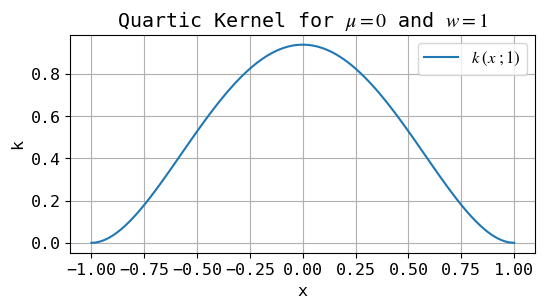

In [85]:
# TODO plot the kernel

x = np.linspace(-1,1,100)
k = kernels(x,0,1).biweight() #initialising the kernel for mu=0, and w=1 over the range x=[-1,1]

#plotting the result
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
plt.plot(x,k,label=r'$k\;(x\;;1)$')
plt.xlabel('x')
plt.ylabel('k')
plt.title(r'Quartic Kernel for $\mu=0$ and $w=1$')
plt.legend()
ax.set_aspect(1)
plt.grid()

### (b) Take the first $N = 50$ data points from `samples.npy`, compute and plot the KDE over the range $[−10, 20]$ for a set of different bandwidths (e.g. $w ∈ {0.1, 0.5, 1, 3, 5}$). Discuss the results and the influence of the bandwidth. Which bandwidth is optimal in your opinion? Explore what happens as you increase the number of samples $N$.

In [20]:
# load the data
data = np.load("data/samples.npy")
data50 = data[:50]
print(f'{data.shape=}, {data50.shape=}')

data.shape=(10000,), data50.shape=(50,)


In order to get the Kernel Density Estimate, we need to imply the following algorithm over the given dataset.

KDE Algorithm:

$$
f(x) = \frac{1}{nw} \sum^n_{i=0} K \left( \frac{x-X_i}{w} \right)
$$

where, 
- $K$ = Kernel function 
- $n$ = no. of observations
- $X_i$ = $i^{th}$ observation of the random variable
- $w$ = bandwidth

In [161]:
def kde(x, obs, w=1):
    # TODO: implement the KDE with the biweight kernel
    n = len(obs)
    density = (sum(kernels(x, xi, w).biweight() for xi in obs))/(n*1) #summing the kernels over each observation to get the complete KDE

    return density 
    
def kde_plotter(data,x,w,ncols,nrows=None,bins=50,figsize=(18,10)):
    '''
    Plots KDE over given dataset
    '''
    plt.figure(figsize=figsize)
    plt.subplots_adjust(hspace=0.2)
    plt.suptitle(f"KDE for $N={len(data)}$ data points at different bandwidths", fontsize=18, y=0.95)
    plt.tight_layout()

    #setting no. of rows and columns for subplot
    ncols = 3
    if nrows == None:
        nrows = len(w) // ncols + (len(w) % ncols > 0) # calculating number of rows

    for n,wi in enumerate(w):
        #adding subplot iteratively
        ax = plt.subplot(nrows, ncols, n + 1)
        
        #plotting the data histogram and KDE
        ax.hist(data,bins=bins,density=True);
        fx = kde(x, data, wi)
        ax.plot(x,fx/np.max(fx))  

        # chart formatting
        ax.grid()
        ax.set_title(f'w={wi}')
        ax.set_xlabel("x-values")
        ax.set_ylabel("KDE")

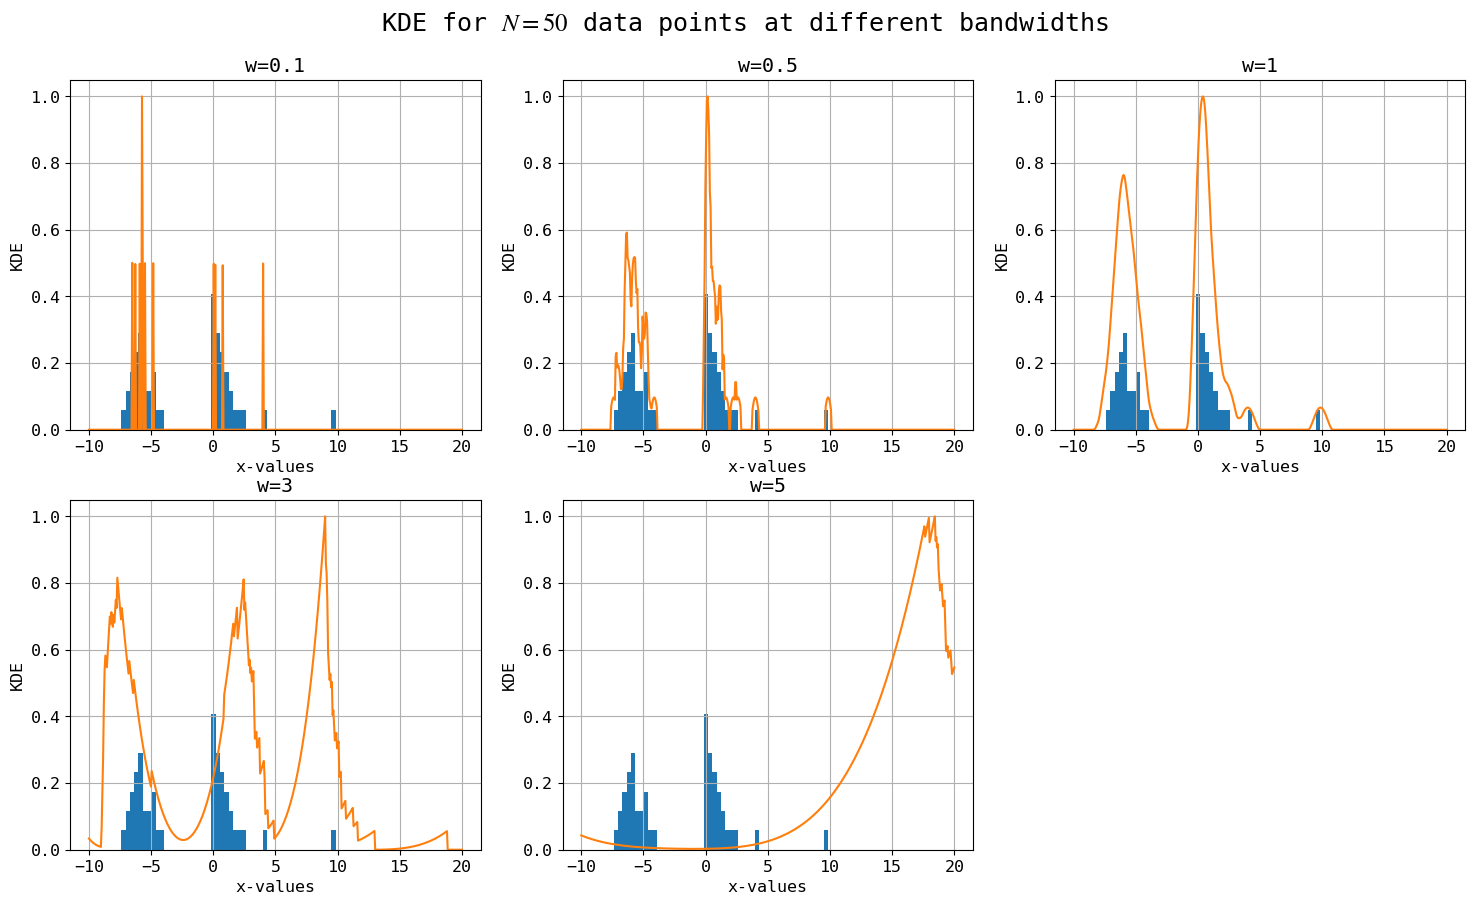

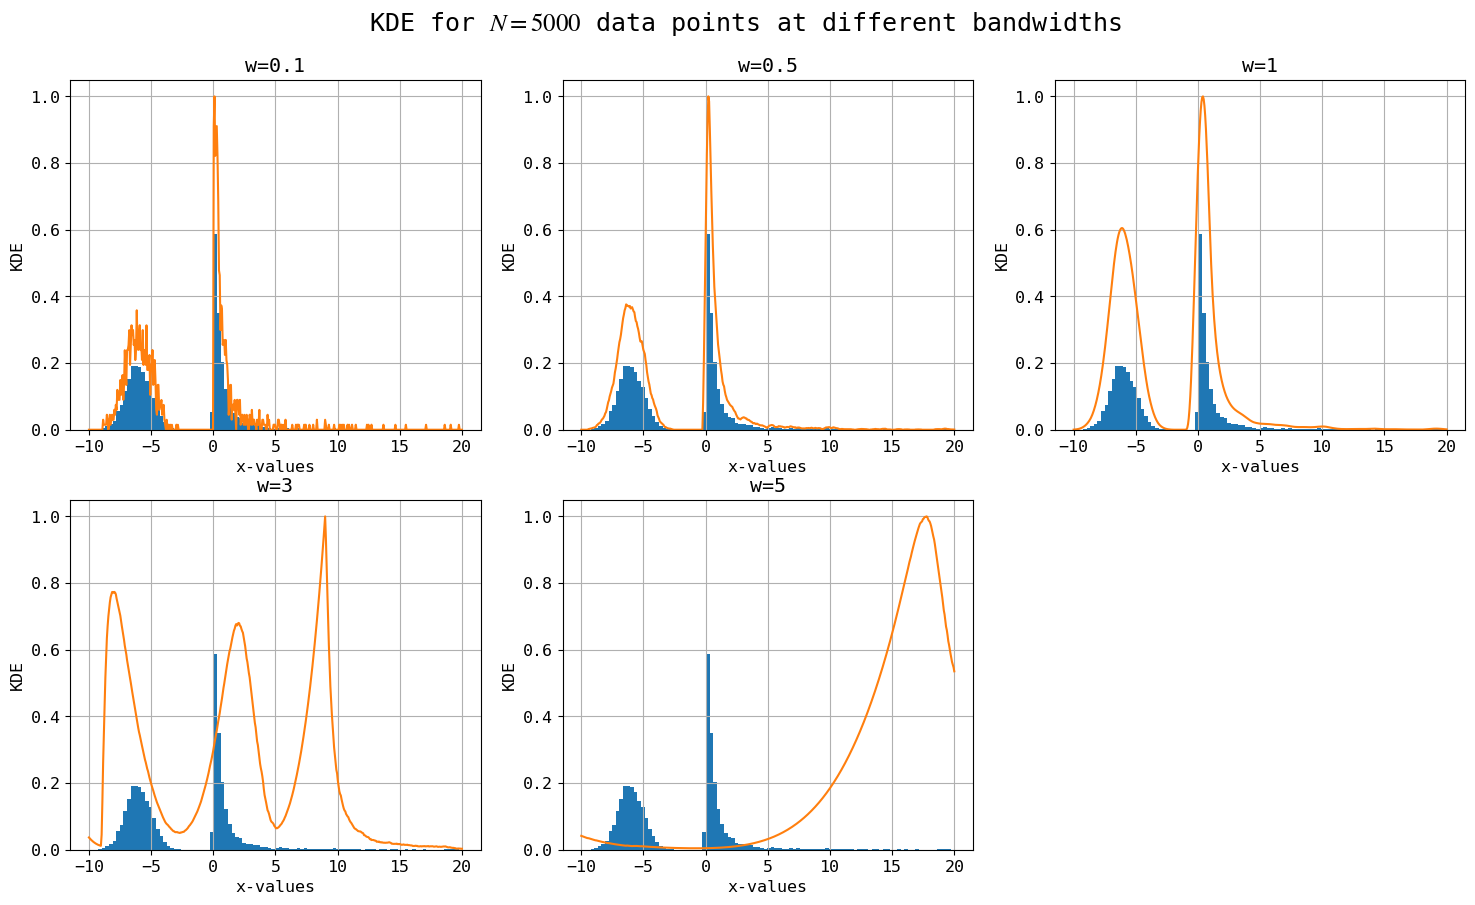

In [168]:
# TODO: compute and plot the kde on the first 50 data points

x = np.linspace(-10,20,500) # x-array
w = [0.1,0.5,1,3,5] #list of weights to implement

kde_plotter(data50,x,w,3,bins=50,figsize=(18,10))

# TODO: explore what happens when you increase the number of points
data5000 = data[:5000]
kde_plotter(data5000,x,w,3,bins=100,figsize=(18,10))

## Discussion

## On Bandwidth:

1. Bandwidth definately changes a lot how the KDE looks like. 
2. Smaller bandwidths leads to undersmoothing and larger bandwidths leads to oversmoothing.
3. Moreover, apart from oversmoothing on larger bandwidths, we can observe extra peaks in the KDE mainly in $w=3$ and $w=5$ plots.
4. To inspect the reason behind that, we plotted the base Kernel for varying bandwidths and found out that the Quartic function has side peaks for $w > 1$ (see the plots below). These side peaks are the reason for bad KDE in our plots.
5. Hence, from this we can also confirm that $u = \frac{x - \mu}{w}$ should always follow $|u|\le1$. This condition is aso true for epanechnikov kernel.

## On optimal bandwidth:

1. From the plots, we arrived at the conclusion that $w=1$ is the most optimal bbandwidth for this dataset as it has clearly spereated smoothed peaks.
2. Smaller bandwidths produce noisy KDEs and hence not an optimal choice.
3. More precise bandwidth for a particular dataset can be selected using advanced methods like Cross-Validation, Sheather and Jones method, etc.

## On increased no. of samples N:

1. As taught in the lecture, the KDE does not depend on the no. of samples but only on the kernel. We can quite confirm that by plotting the KDE for $N=5000$ samples.
2. Although there are a few changes due to the increased no. of samples.
3. All the plots have comparitavely smoother peaks than earlier. We suspect that this could be due to the fact that their are more samples that means their are more no. of kernels summing over and creating more smoother versions. 
4. But even with this the most optimal choice for bandwidth remains same as there is still noise and other problems such as over and undersmoothing.

/var/folders/zd/rsl4z8j50cg9m4ll966fsyn80000gn/T/ipykernel_7717/1779759351.py:7: RuntimeWarning: invalid value encountered in divide
  [ax[0].plot(x,kernels(x,0,wi).biweight()/np.max(kernels(x,0,wi).biweight()),label=f'k(w={wi})') for wi in w]


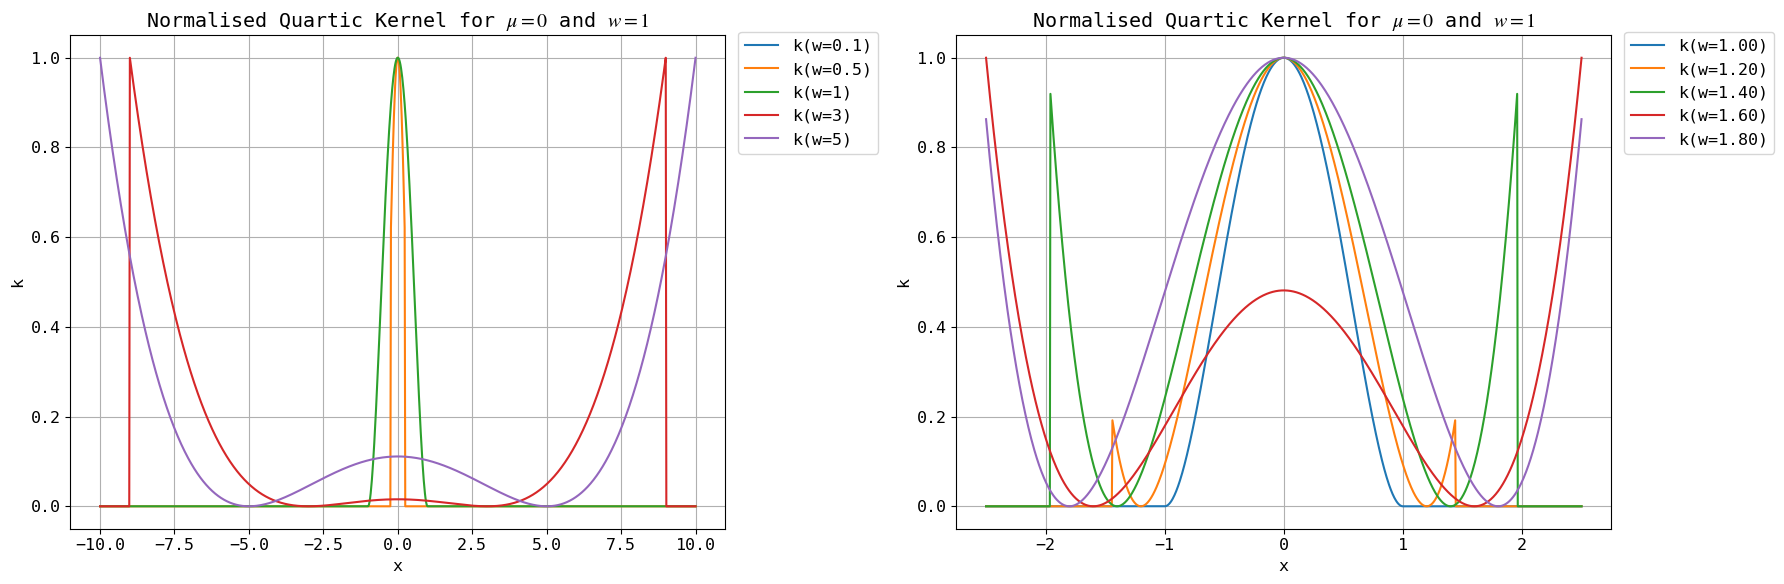

In [157]:
fig,ax = plt.subplots(1,2,figsize=(18,6))

#plot1
x = np.linspace(-10,10,1000)
w = [0.1,0.5,1,3,5]
[ax[0].plot(x,kernels(x,0,wi).biweight()/np.max(kernels(x,0,wi).biweight()),label=f'k(w={wi})') for wi in w]

ax[0].set_xlabel('x')
ax[0].set_ylabel('k')
ax[0].set_title(r'Normalised Quartic Kernel for $\mu=0$ and $w=1$')
ax[0].legend(loc=(1.02,0.76))
# ax[0].set_aspect(1)
ax[0].grid()

#plot2
x1 = np.linspace(-2.5,2.5,1000)
w1 = np.arange(1,2,0.2)
[ax[1].plot(x1,kernels(x1,0,wi).biweight()/np.max(kernels(x1,0,wi).biweight()),label=f'k(w={wi:.2f})') for wi in w1]

# ax[1].set_xlim(-1.5,1.5)
# ax[1].set_ylim(-0.01,0.1)
ax[1].set_xlabel('x')
ax[1].set_ylabel('k')
ax[1].set_title(r'Normalised Quartic Kernel for $\mu=0$ and $w=1$')
ax[1].legend(loc=(1.02,0.76))
# ax.set_aspect(1)
ax[1].grid()

fig.tight_layout()

## 3 Mean-Shift
(b) Bonus

In [115]:
# TODO: implement the update to the local mean

def mean_shift_step(x, xt, r=1):
    """
    A single step of mean shift, moving every point in xt to the local mean of points in x within a radious of r.
    
    Parameters
    ----------
    x : np.ndarray
        Array of points underlying the KDE, shape (d, N1)
    xt : np.ndarray
        Current state of the mean shift algorithm, shape (d, N2)
    n_components : int, optional
        Number of requested components. By default returns all components.
        
    Returns
    -------
    np.ndarray
        the points after the mean-shift step
    """
    # NOTE: For the excercise you only need to implement this for d == 1. 
    #       If you want some extra numpy-practice, implement it for arbitrary dimension
    
    assert xt.shape[0] == x.shape[0], f'Shape mismatch: {x.shape[0]}!={xt.shape[0]}'
    
    # TODO: compute a N by N matrix 'dist' of distances, 
    #       such that dists[i, j] is the distance between x[i] and xt[j]
    # N = x.shape[0]
    # x_dots = (x*x).sum(axis=0).reshape((N,1))*np.ones(shape=(1,N))
    # xt_dots = (xt*xt).sum(axis=0)*np.ones(shape=(N,1))
    # D_sqr =  x_dots + xt_dots -2*x.dot(xt.T)
    # zero_mask = np.less(D_sqr, 0.0)
    # D_sqr[zero_mask] = 0.0
    # d = np.sqrt(D_sqr)
    d = np.sqrt(np.sum(np.square(x - xt)))

    # TODO: threshold the distances with r to get an array of masks for every data point
    masks = []
    for i in range(0,len(x)):
        ind = np.where(d[i]<1)[0]
        masks.append(d[i,ind])
    
    # TODO: compute the number of points in x within radius r of each xt
    counts = []
    for i in range(0,len(x)):
        counts.append(len(masks[i]))
    
    # TODO: compute the local means by summing over the neighbors of each element in xt 
    #       and dividing by the number of neighbors
    local_means = []
    for i in range(0,len(masks)):
        if(counts[i]!=0):
            s = np.sum(masks[i])
            local_means.append(s/counts[i])
        else:
            local_means.append(0)
    return local_means
    
    

In [116]:
# load the data
data = np.load("data/samples.npy")
x = data[:200]  # use e.g. the first 200 points
xt = x

trajectories = [xt]
max_steps = 100
for step in range(max_steps):
    
    # TODO: update xt with your mean shift step
    local_mu = mean_shift_step(x,xt,r=1)
    xt = xt+local_mu
    print(step)
    trajectories.append(xt)
    if np.allclose(trajectories[-1], trajectories[-2]):  # break in case of convergence
        break
trajectories = np.stack(trajectories)
n_steps = len(trajectories) - 1


# TODO: plot the trajectories


IndexError: invalid index to scalar variable.

In [3]:
# TODO: repeat the above for "blurring" mean shift


## 4 K-Means

(b)

In [ ]:
from sklearn.cluster import KMeans

def kmeans_step(x, k, c=None, init='random'):
    """
    K-Means clustering on a p x N data matrix.
    
    Parameters
    ----------
    x : np.ndarray
        Data matrix of shape (p, N).
    k : int
        Number of cluster.
    c : np.ndarray, optional
        Current cluster centers. If None, the initialization as specified by 'init' will be used.
    init: str
        The initialization method to be used if c is None.
        
    Returns
    -------
    float, np.ndarray
        cost after the step, updated cluster centers
    """
    
    if c is not None: 
        assert c.shape[1] == k
        
    # Note: the documentation is your friend: 
    #       https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    
    # TODO: set n_cluster, init, n_init and max_iter appropriately
    single_step_kmeans = KMeans(
        n_clusters=, 
        init=, 
        max_iter=,
        n_init=,
    )
    
    # TODO call the single_step_kmeans
    
    # TODO get the current energy (you don't have to compute it - it's stored in single_step_kmeans)
    E = 
    
    # TODO read out cluster centers 
    c = 
    
    return E, c 
    

In [ ]:
# load the data (you can try both with the full normalized feature and the 2d umap projection)

features = np.load('data/dijet_features_normalized.npy')  # full features
# features = np.load('data/dijet_features_umap.npy')      # umap projection

print(f'{features.shape=}')

In [ ]:
def kmeans(x, k, max_steps=100, init='random'):
    c = None
    energies = []  # list of energies over the iterations. 
    for i in range(max_steps):
        # Call the kmeans_step implemented above to get the energy and the next cluster centers
        E, c = kmeans_step(x, k=k, c=c, init=init)
        energies.append(E)
        
        # Stop the loop if there was no improvement
        if i>=2 and energies[-1] == energies[-2]:
            break
    energies = np.array(energies)
    return energies  # return array of energies


for k in [3, 5, 10, 20]:
    for init in ['k-means++', 'random']:
        # TODO: for the given k and init, run k-means 20 times or more (using the kmeans function above)
        #       and plot the resulting energy trajectores
        